In [5]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.1.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [8]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.1.2"


In [1]:
data <- read.csv("C:/Users/FDN-Aysu/shinyapp/data/ppdata_lite.csv", header = TRUE, sep = ',')

TASK A

A1

I wanted to plot of London city boroughts. There are 33 boroughts in London with names: City of London, Barking and Dagenham, Barnet, Bexley, Brent, Bromley, Camden, Croydon, Ealing, Enfield, Greenwich, Hackney, Hammersmith and Fulham, Haringey, Harrow, Havering, Hillingdon, Hounslow, Islington, Kensington and Chelsea, Kingston upon Thames, Lambeth, Lewisham, Merton, Newham, Redbridge, Richmond upon Thames, Southwark, Sutton, Tower Hamlets, Waltham Forest, Wandsworth, Westminster.

In [14]:
data1<-data[1:20000,]
data_london<-data1 %>% 
    filter_all(any_vars(. %in% c("GREATER LONDON")))
data_london<-data_london[1:5000,]

Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"


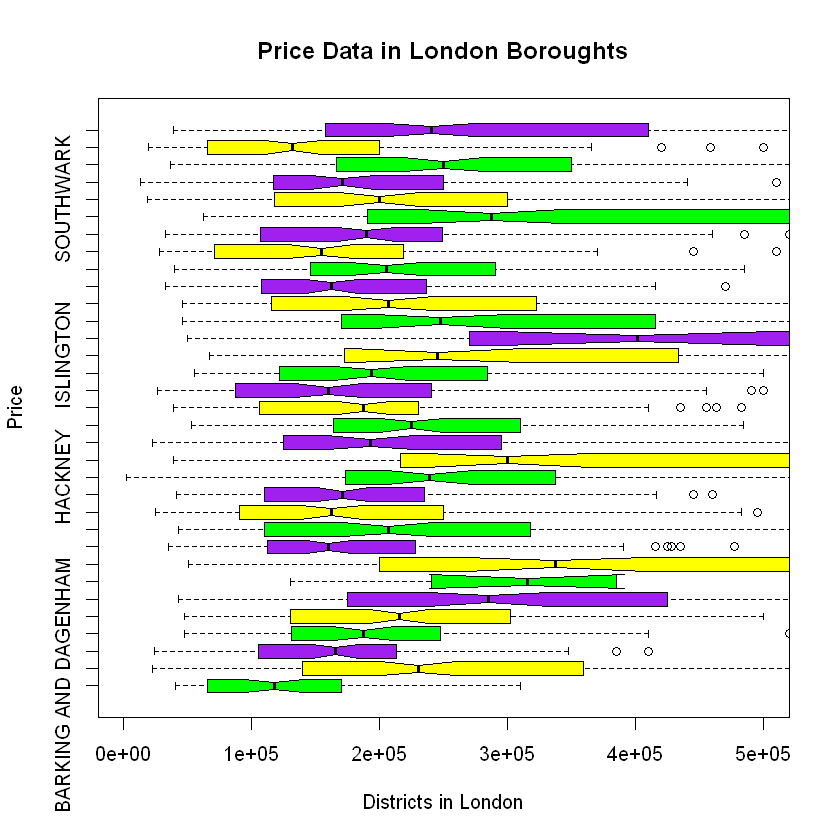

In [23]:
boxplot(price ~ district, data = data_london, 
        xlab = "Districts in London",
        ylab = "Price", 
        main = "Price Data in London Boroughts",
        notch = T, 
        varwidth = F, 
        col = c("green","yellow","purple"),
        ylim= c(0,500000),
        height=100,
        witdh=50,
        horizontal=TRUE
)


Warning message:
"Removed 2311 rows containing non-finite values (stat_boxplot)."


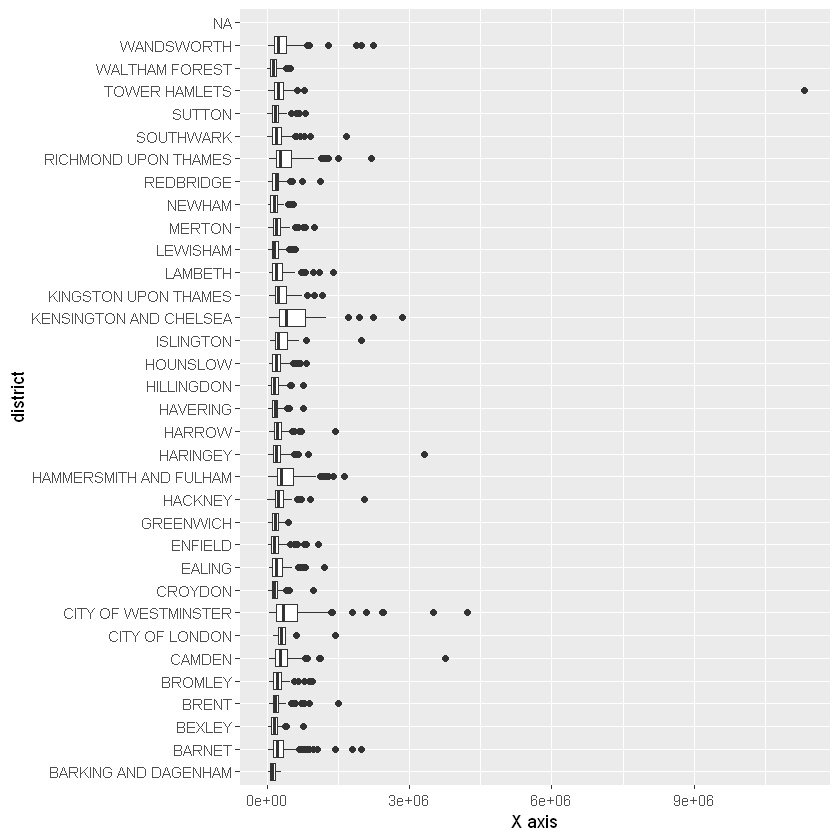

In [32]:
q<-ggplot(data_london, aes(price,district)) +
geom_boxplot()


q + scale_x_continuous("X axis")

Instead of box plot, geom point usage can provide a better visualization

Warning message:
"Removed 2311 rows containing missing values (geom_point)."


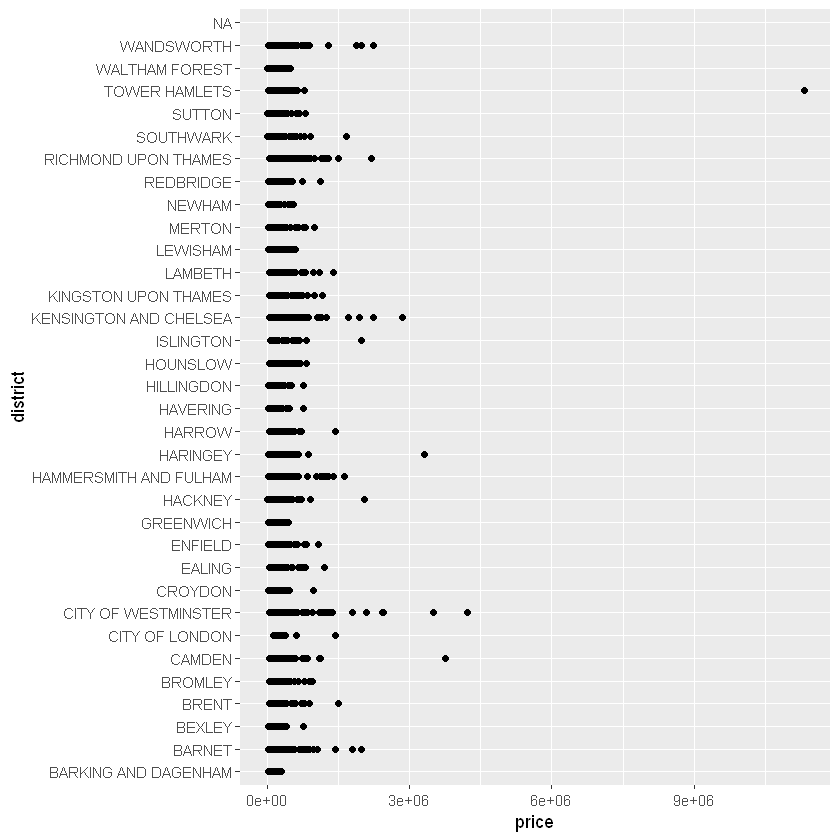

In [24]:
ggplot(data_london, 
       aes(price,district)) + 
geom_point()

A2

in data set we dont have floor level. So, I can not compare realtion between price and floor level

TASK B

B1

In [33]:
ukpostcodes <- read.csv("C:/Users/FDN-Aysu/shinyapp/data/ukpostcodes.csv", header = TRUE, sep = ',')

In [38]:
head(ukpostcodes)

,id,postcode,latitude,longitude
,<int>,<chr>,<dbl>,<dbl>
1,1,AB10 1XG,57.14417,-2.114848
2,2,AB10 6RN,57.13788,-2.121487
3,3,AB10 7JB,57.12427,-2.127190
4,4,AB11 5QN,57.14270,-2.093015
5,5,AB11 6UL,57.13755,-2.112696
6,6,AB11 8RQ,57.13598,-2.072115


In [41]:
#I splitted postcode by numbers using strsplit function
split_part_postcode<-strsplit(ukpostcodes$postcode, split = "[0-9]+")
#This code turned postcode two letter part, We need first variable
#First two letter is in location 4 and 5
ukpostcodes$postnew<-substr(split_part_postcode, 4,5)
#now we have actual post codes in postnew column

In [ ]:
#data should be ordered for connecting to dots (edges)
ukpostcodes_new <- ukpostcodes[order(-ukpostcodes$latitude, ukpostcodes$longitude),]

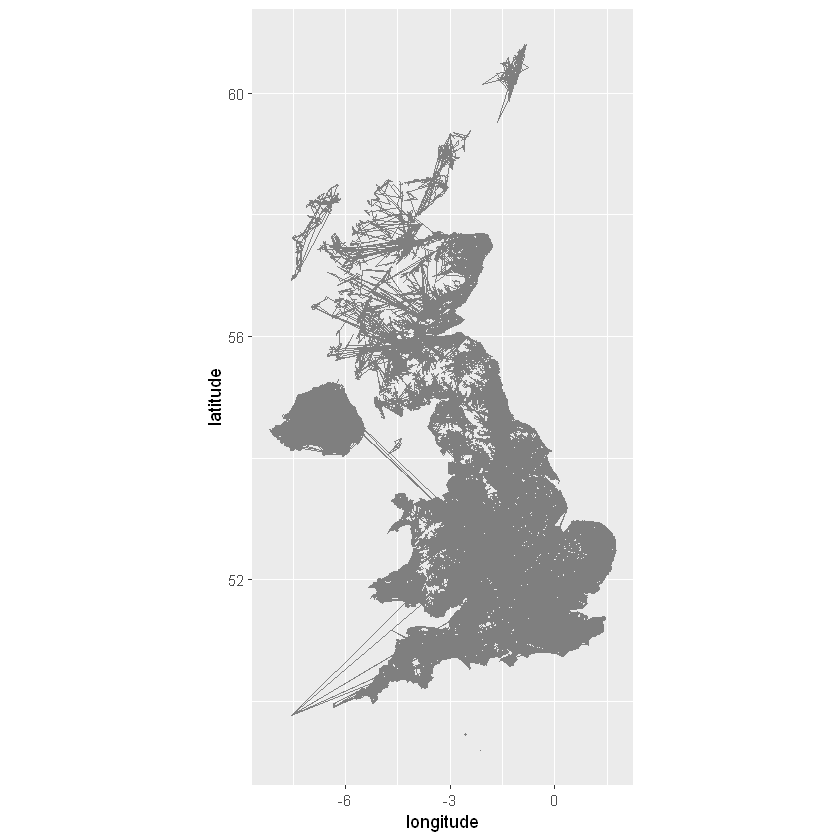

In [42]:
ggplot(ukpostcodes, 
       aes(longitude, latitude)) +
        geom_polygon(aes(group = postnew), 
                     fill = NA, 
                     colour = "grey50") + 
        coord_quickmap()